<a href="https://colab.research.google.com/github/mohamed3kane/orie4580-hw2/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 4

#### Students: Marco La Vecchia (mal426), Mohamed Kane (mek298)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

In [ ]:
import numpy as np

# Reproducibility
np.random.seed(42)

# Step 1: Simulate passenger arrivals
n = 10_000
arrival_times = np.random.uniform(0, 1000, size=n)

# Step 2: Compute wait times until next train (trains every 10 minutes)
wait_times = (10 - (arrival_times % 10)) % 10

# Step 3: Calculate statistics
mean_wait = wait_times.mean()
std_wait = wait_times.std(ddof=1)   # sample std deviation
se = std_wait / np.sqrt(n)          # standard error
z = 1.96                            # 95% confidence level
ci_lower = mean_wait - z * se
ci_upper = mean_wait + z * se

# Step 4: Print results
print(f"Estimated mean wait: {mean_wait:.3f} minutes")
print(f"Sample standard deviation: {std_wait:.3f} minutes")
print(f"95% CI for mean wait: [{ci_lower:.3f}, {ci_upper:.3f}] minutes")


Estimated mean wait: 5.017 minutes
Sample standard deviation: 2.889 minutes
95% CI for mean wait: [4.961, 5.074] minutes


<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.

In [ ]:
import numpy as np

# Reproducibility
np.random.seed(42)

# Step 1: Simulate passenger arrivals (same vector as before)
n = 10_000
arrival_times = np.random.uniform(0, 1000, size=n)

# Step 2: Generate train arrivals with exponential(10) inter-arrival times
train_arrivals = [0.0]
while train_arrivals[-1] < 1000:
    train_arrivals.append(train_arrivals[-1] + np.random.exponential(scale=10))
train_arrivals = np.array(train_arrivals)

# Step 3: Compute waiting time for each passenger
wait_times = []
for t in arrival_times:
    next_train_idx = np.searchsorted(train_arrivals, t, side="left")
    next_train_time = train_arrivals[next_train_idx]
    wait_times.append(next_train_time - t)

wait_times = np.array(wait_times)

# Step 4: Calculate statistics
mean_wait = wait_times.mean()
std_wait = wait_times.std(ddof=1)
se = std_wait / np.sqrt(n)
z = 1.96  # 95% confidence level
ci_lower = mean_wait - z * se
ci_upper = mean_wait + z * se

# Step 5: Print results
print(f"Estimated mean wait: {mean_wait:.3f} minutes")
print(f"Sample standard deviation: {std_wait:.3f} minutes")
print(f"95% CI for mean wait: [{ci_lower:.3f}, {ci_upper:.3f}] minutes")


Estimated mean wait: 9.672 minutes
Sample standard deviation: 8.780 minutes
95% CI for mean wait: [9.500, 9.845] minutes


<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [ ]:
inter_arrivals = np.diff(train_arrivals)
# Only keep intervals where the first train is before 1000
inter_arrivals = inter_arrivals[train_arrivals[:-1] < 1000]

mean_inter = inter_arrivals.mean()
std_inter = inter_arrivals.std(ddof=1)
se_inter = std_inter / np.sqrt(len(inter_arrivals))
ci_inter = (mean_inter - z * se_inter, mean_inter + z * se_inter)

print("Train Inter-Arrival Times (Exponential Trains)")
print(f"  Number of observed intervals: {len(inter_arrivals)}")
print(f"  Estimated mean inter-arrival: {mean_inter:.3f} minutes")
print(f"  Sample standard deviation: {std_inter:.3f} minutes")
print(f"  95% CI for mean inter-arrival: [{ci_inter[0]:.3f}, {ci_inter[1]:.3f}] minutes")

Train Inter-Arrival Times (Exponential Trains)
  Number of observed intervals: 98
  Estimated mean inter-arrival: 10.307 minutes
  Sample standard deviation: 9.684 minutes
  95% CI for mean inter-arrival: [8.390, 12.224] minutes


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

In [ ]:
import numpy as np

def ci_mean(x, z=1.96):
    n = len(x)
    mean = x.mean()
    sd = x.std(ddof=1)
    se = sd / np.sqrt(n)
    return mean, sd, (mean - z*se, mean + z*se)

# Reproducibility
np.random.seed(42)

# Passenger arrivals
n = 10_000
arrival_times = np.random.uniform(0, 1000, size=n)

# -------------------------------
# (a) Deterministic trains (every 10 minutes)
# -------------------------------
train_times_det = np.arange(0, 1000 + 10, 10.0)

I_det = []
for t in arrival_times:
    nidx = np.searchsorted(train_times_det, t, side="left")
    if nidx > 0:
        I_det.append(train_times_det[nidx] - train_times_det[nidx - 1])
I_det = np.array(I_det)
mean_I_det, sd_I_det, ci_I_det = ci_mean(I_det)

print("(a) Deterministic trains")
print(f"  Passenger-experienced inter-arrival mean: {mean_I_det:.3f} minutes")
print(f"  SD: {sd_I_det:.3f} minutes")
print(f"  95% CI: [{ci_I_det[0]:.3f}, {ci_I_det[1]:.3f}] minutes")
print()

# -------------------------------
# (b) Exponential trains (mean 10)
# -------------------------------
train_times_exp = [0.0]
while train_times_exp[-1] < 1000:
    train_times_exp.append(train_times_exp[-1] + np.random.exponential(scale=10))
train_times_exp = np.array(train_times_exp)

I_exp = []
for t in arrival_times:
    nidx = np.searchsorted(train_times_exp, t, side="left")
    if nidx > 0:
        I_exp.append(train_times_exp[nidx] - train_times_exp[nidx - 1])
I_exp = np.array(I_exp)
mean_I_exp, sd_I_exp, ci_I_exp = ci_mean(I_exp)

print("(b) Exponential trains")
print(f"  Passenger-experienced inter-arrival mean: {mean_I_exp:.3f} minutes")
print(f"  SD: {sd_I_exp:.3f} minutes")
print(f"  95% CI: [{ci_I_exp[0]:.3f}, {ci_I_exp[1]:.3f}] minutes")


(a) Deterministic trains
  Passenger-experienced inter-arrival mean: 10.000 minutes
  SD: 0.000 minutes
  95% CI: [10.000, 10.000] minutes

(b) Exponential trains
  Passenger-experienced inter-arrival mean: 19.345 minutes
  SD: 11.596 minutes
  95% CI: [19.118, 19.573] minutes


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-565129364.py:23: SyntaxWarning: invalid escape sequence '\l'
  plt.title("Uniform samples in region $0 \leq y \leq e^{-x^2/2}$")


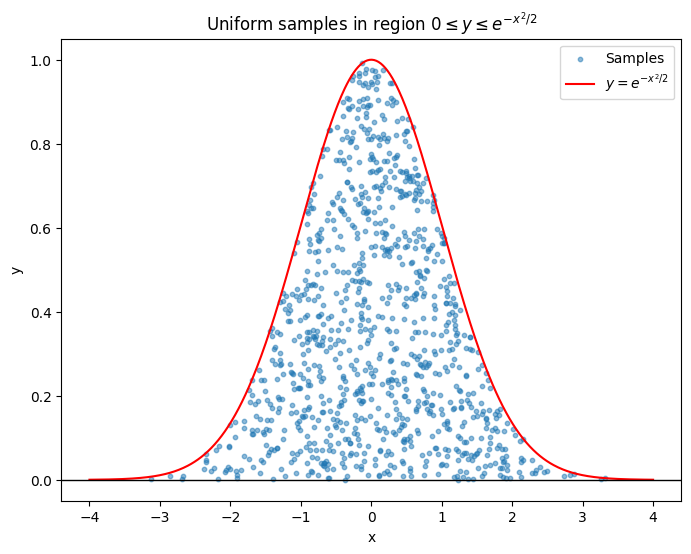

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# number of samples
n = 1000

# Step 1: sample X from standard normal
X = np.random.randn(n)

# Step 2: sample Y uniformly between 0 and exp(-X^2/2)
Y = np.random.uniform(low=0, high=np.exp(-X**2/2))

# Plot
x_vals = np.linspace(-4, 4, 500)
upper_curve = np.exp(-x_vals**2 / 2)

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, s=10, alpha=0.5, label="Samples")
plt.plot(x_vals, upper_curve, 'r', label=r"$y=e^{-x^2/2}$")
plt.axhline(0, color='k', linewidth=1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Uniform samples in region $0 \leq y \leq e^{-x^2/2}$")
plt.legend()
plt.show()


<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

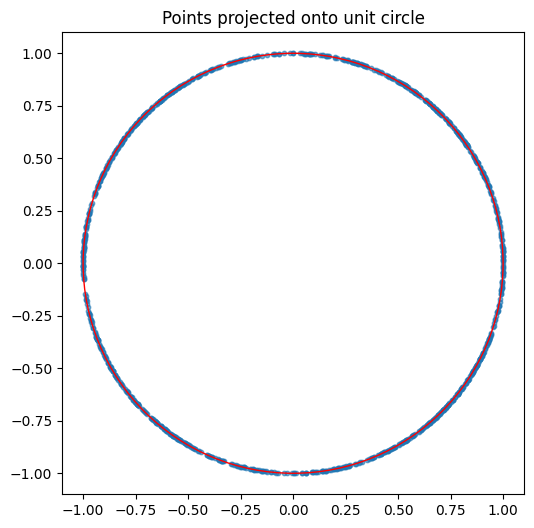

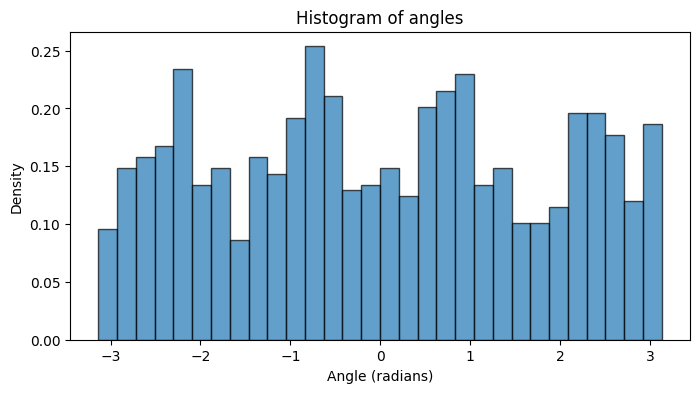

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000

# Step 1: sample uniformly in the square [-1,1]^2
U = np.random.uniform(-1, 1, n)
V = np.random.uniform(-1, 1, n)

# Step 2: project onto the unit circle
norms = np.sqrt(U**2 + V**2)
X = U / norms
Y = V / norms

# Scatter plot of the points
plt.figure(figsize=(6,6))
plt.scatter(X, Y, s=10, alpha=0.6)
circle = plt.Circle((0,0), 1, color='r', fill=False)
plt.gca().add_artist(circle)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Points projected onto unit circle")
plt.show()

# Step 3: check uniformity by histogram of angles
theta = np.arctan2(Y, X)  # values in [-pi, pi]

plt.figure(figsize=(8,4))
plt.hist(theta, bins=30, density=True, alpha=0.7, edgecolor='k')
plt.xlabel("Angle (radians)")
plt.ylabel("Density")
plt.title("Histogram of angles")
plt.show()


These are not  uniformly distributed on the circumference of the circle. If it was then the histogram would be a flat line. but the sampling must be bias.

<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

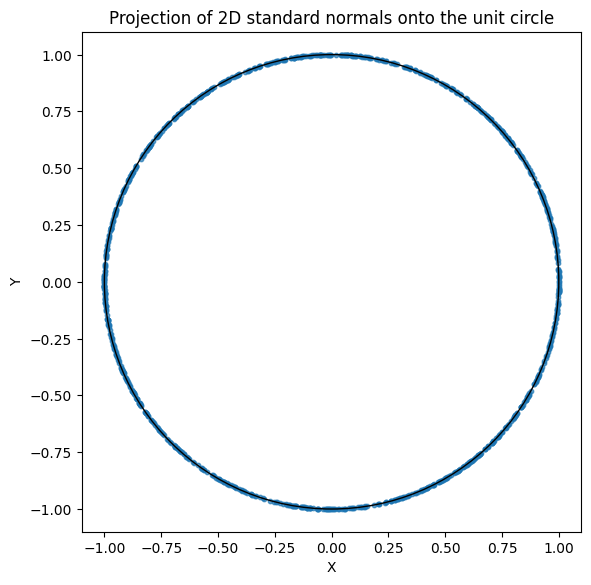

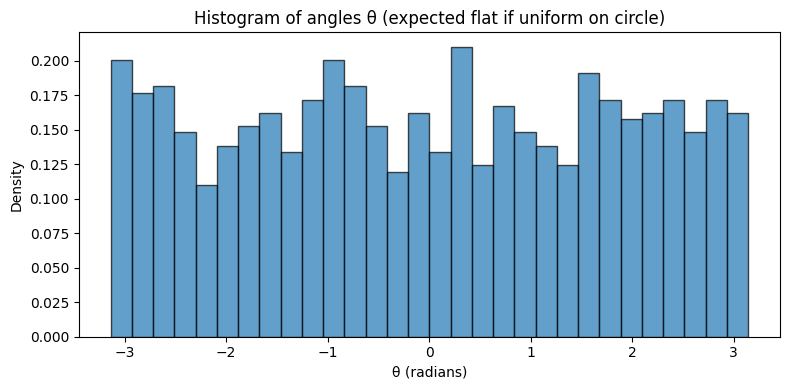

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- parameters ---
n = 1000
rng = np.random.default_rng()

# 1) Draw independent standard normals
Z = rng.standard_normal(n)
W = rng.standard_normal(n)

# 2) Project onto the unit circle
r = np.sqrt(Z**2 + W**2)
# (Probability that r=0 is 0, but add a tiny epsilon for numerical safety)
eps = 1e-15
X = Z / (r + eps)
Y = W / (r + eps)

# 3) Scatter plot on the circle
plt.figure(figsize=(6,6))
plt.scatter(X, Y, s=10, alpha=0.7)
circle = plt.Circle((0,0), 1, fill=False)
ax = plt.gca()
ax.add_artist(circle)
ax.set_aspect('equal', adjustable='box')
plt.title("Projection of 2D standard normals onto the unit circle")
plt.xlabel("X"); plt.ylabel("Y")
plt.tight_layout()
plt.show()

# 4) Check uniformity: histogram of angles
theta = np.arctan2(Y, X)  # in [-pi, pi]
plt.figure(figsize=(8,4))
plt.hist(theta, bins=30, density=True, edgecolor='k', alpha=0.7)
plt.title("Histogram of angles θ (expected flat if uniform on circle)")
plt.xlabel("θ (radians)"); plt.ylabel("Density")
plt.tight_layout()
plt.show()


it seems to be more uniformilt distributed because the histogram is flatter. This makes sense because the difference between b and c is that c the distribution is rotationally invariant

<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.
the returns are independent and normally distributed, the probability that all are positive is

$$
\ P(\text{all } > 0) \;=\; \prod_{i=1}^3 \ P(X_i > 0) \;=\; \prod_{i=1}^3 \Phi\!\left(\frac{\mu_i}{\sigma_i}\right),
$$

where $\Phi$ is the CDF of the standard normal distribution.

---

#### Compute standard deviations
- U.S. stocks: $\sigma = \sqrt{0.0625} = 0.25$
- U.S. bonds: $\sigma = \sqrt{0.01} = 0.10$
- EM bonds: $\sigma = \sqrt{0.09} = 0.30$

---

#### Compute z-scores and probabilities
- U.S. stocks: $z = 0.14/0.25 = 0.56,\ \Phi(z) \approx 0.7123$
- U.S. bonds: $z = 0.07/0.10 = 0.70,\ \Phi(z) \approx 0.7580$
- EM bonds: $z = 0.16/0.30 \approx 0.5333,\ \Phi(z) \approx 0.7031$

---

#### Multiply probabilities
$$
\ P(\text{all three positive})
= 0.7123 \times 0.7580 \times 0.7031
\approx 0.3796
$$

---

### Final Answer:
$$
\ P(\text{all returns positive}) \approx 0.38 \;\; \text{(38%)}
$$




<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



In [ ]:
import numpy as np
from scipy.linalg import cholesky  # use lower=True for L

# Mean vector
mu = np.array([0.14, 0.07, 0.16])

# Covariance matrix
Sigma = np.array([
    [0.0625, -0.01,   0.0375],
    [-0.01,   0.01,  -0.015 ],
    [0.0375, -0.015,  0.09  ]
])

# Cholesky decomposition (lower-triangular L such that Sigma = L L^T)
L = cholesky(Sigma, lower=True)

# Simulation parameters
n = 500_000  # number of replications
rng = np.random.default_rng(42)

# Generate independent standard normals (3 x n)
Z = rng.standard_normal((3, n))

# Construct correlated draws
X = mu[:, None] + L @ Z

# Estimate probability all three are positive
all_pos = np.all(X > 0, axis=0)
p_hat = all_pos.mean()

# Compute standard error and 95% CI
se = np.sqrt(p_hat * (1 - p_hat) / n)
ci95 = (p_hat - 1.96 * se, p_hat + 1.96 * se)

print(f"Estimated probability: {p_hat:.5f}")
print(f"Standard error: {se:.6f}")
print(f"95% CI: {ci95}")


Estimated probability: 0.37014
Standard error: 0.000683
95% CI: (np.float64(0.36880163030597324), np.float64(0.3714783696940268))




#### Result (500,000 simulations)
- Estimated probability: **0.37014**
- Standard error: **0.000683**
- 95% CI: **[0.3688, 0.3715]**

---

### Final Answer:
$$
\ P(\text{all three returns positive}) \approx 0.37 \;\; (37\%)
$$


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.
For a random variable $V \sim U[\alpha, \beta]$, the mean and variance are:

$$
\mathbb{E}[V] = \frac{\alpha + \beta}{2},
\quad
\mathrm{Var}(V) = \frac{(\beta - \alpha)^2}{12}.
$$

**Step 1. Mean condition**

$$
\frac{\alpha + \beta}{2} = 0 \quad \implies \quad \beta = -\alpha.
$$

So the distribution must be symmetric about $0$.


**Step 2. Variance condition**

$$
\mathrm{Var}(V) = \frac{(\beta - \alpha)^2}{12}.
$$

Substitute $\beta = -\alpha$:

$$
\mathrm{Var}(V) = \frac{(-\alpha - \alpha)^2}{12}
= \frac{(-2\alpha)^2}{12}
= \frac{4\alpha^2}{12}
= \frac{\alpha^2}{3}.
$$

Since $\mathrm{Var}(V) = 1$:

$$
\frac{\alpha^2}{3} = 1 \quad \implies \quad \alpha^2 = 3.
$$

Thus:

$$
\alpha = -\sqrt{3}, \quad \beta = \sqrt{3}.
$$

So for the uniform distribution we get that
$$
V \sim U[-\sqrt{3}, \, \sqrt{3}]
$$

has mean $0$ and variance $1$.


<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.
We have $X_1, X_2 \overset{\text{i.i.d.}}{\sim} \text{Uniform}[\alpha,\beta]$ with $\alpha=-\sqrt{3}, \beta=\sqrt{3}$, so
$$
\mathbb{E}[X_i]=0,\qquad \mathrm{Var}(X_i)=1,\qquad i\in\{1,2\}.
$$
Let $B\sim \mathrm{Bernoulli}(p)$, independent of $(X_1,X_2)$, and define
$$
V_2=(1-B)X_1+BX_2=\begin{cases}
X_1,& B=0\\
X_2,& B=1~.
\end{cases}
$$

**Expectation** (law of total expectation):
$$
\mathbb{E}[V_2]
=\mathbb{E}\big[\mathbb{E}[V_2\mid B]\big]
=(1-p)\,\mathbb{E}[X_1]+p\,\mathbb{E}[X_2]
=(1-p)\cdot 0+p\cdot 0
=0.
$$

**Variance** (law of total variance):
$$
\mathrm{Var}(V_2)
=\mathbb{E}\big[\mathrm{Var}(V_2\mid B)\big]+\mathrm{Var}\big(\mathbb{E}[V_2\mid B]\big).
$$
Now,
$$
\mathrm{Var}(V_2\mid B=0)=\mathrm{Var}(X_1)=1,\qquad
\mathrm{Var}(V_2\mid B=1)=\mathrm{Var}(X_2)=1,
$$
and
$$
\mathbb{E}[V_2\mid B=0]=\mathbb{E}[X_1]=0,\qquad
\mathbb{E}[V_2\mid B=1]=\mathbb{E}[X_2]=0.
$$
Hence
$$
\mathrm{Var}(V_2)= (1-p)\cdot 1 + p\cdot 1 + \mathrm{Var}(0)=1.
$$

$$
\boxed{\ \mathbb{E}[V_2]=0,\qquad \mathrm{Var}(V_2)=1\ }
$$


<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

## Ans.
We have $V_1=X_1$ and $V_2=(1-B)X_1+BX_2$, with $X_1,X_2$ i.i.d., $\mathbb{E}[X_i]=0$, $\mathrm{Var}(X_i)=1$, and $B\sim\mathrm{Bernoulli}(p)$ independent of $(X_1,X_2)$.

Since $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$,
$$
\mathrm{Cov}(V_1,V_2)=\mathbb{E}[V_1V_2].
$$
Compute
$$
\mathbb{E}[V_1V_2]
=\mathbb{E}\!\left[X_1\big((1-B)X_1+BX_2\big)\right]
=\mathbb{E}\!\left[(1-B)X_1^2\right]+\mathbb{E}\!\left[B X_1X_2\right].
$$
Independence gives $\mathbb{E}[(1-B)X_1^2]=(1-p)\mathbb{E}[X_1^2]=(1-p)$ and
$\mathbb{E}[B X_1X_2]=p\,\mathbb{E}[X_1]\mathbb{E}[X_2]=0$. Hence
$$
\mathrm{Cov}(V_1,V_2)=1-p.
$$

To achieve $\mathrm{Cov}(V_1,V_2)=\sigma_{12}\ (\sigma_{12}\ge 0)$, set
$$
\boxed{\,p=1-\sigma_{12}\,}
$$

<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

## Ans.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Uniform[-sqrt(3), sqrt(3)] gives mean 0 and variance 1
alpha, beta = -np.sqrt(3), np.sqrt(3)

def p_from_sigma12(sigma12):
    """Choose p so that Cov(V1, V2) = sigma12 (valid for sigma12 in [0,1])."""
    if not (0.0 <= sigma12 <= 1.0):
        raise ValueError("sigma12 must be in [0, 1] for this construction.")
    return 1.0 - sigma12

def sample_correlated_uniforms(n, sigma12, seed=None):
    """
    Generate n samples of (V1, V2) with Var(V1)=Var(V2)=1 and Cov(V1,V2)=sigma12.
      V1 = X1
      V2 = (1-B) X1 + B X2
    where X1, X2 ~ Uniform[alpha, beta], B ~ Bernoulli(p), p = 1 - sigma12.
    """
    rng = np.random.default_rng(seed)
    X1 = rng.uniform(alpha, beta, size=n)
    X2 = rng.uniform(alpha, beta, size=n)
    p = p_from_sigma12(sigma12)
    B = rng.binomial(1, p, size=n)
    V1 = X1
    V2 = (1 - B) * X1 + B * X2
    return V1, V2


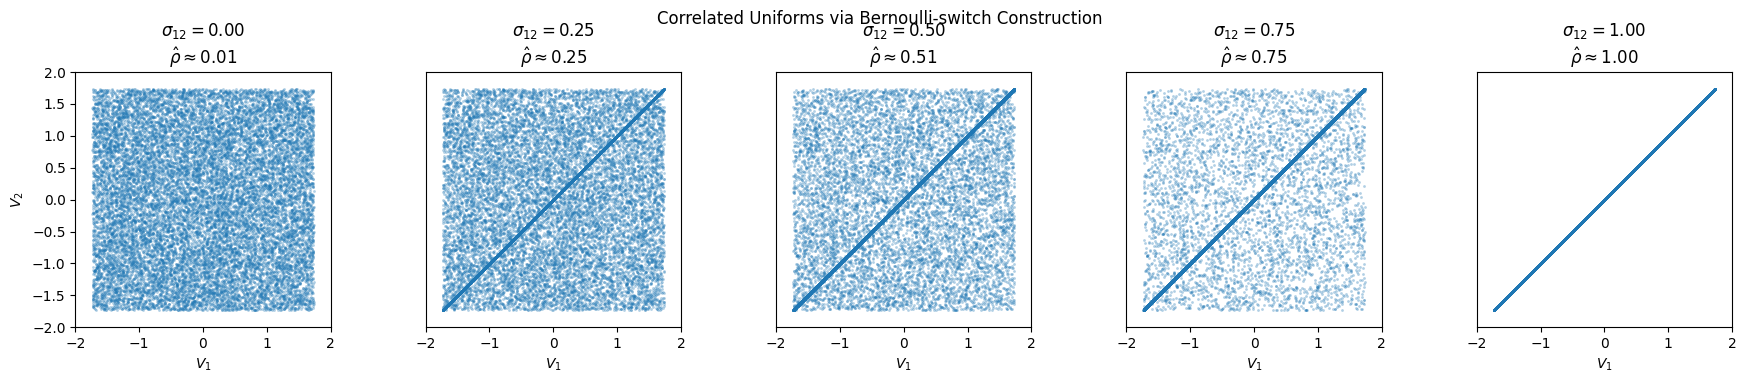

In [2]:
sigmas = [0.0, 0.25, 0.5, 0.75, 1.0]
n = 20000

fig, axes = plt.subplots(1, len(sigmas), figsize=(18, 3.6), constrained_layout=True)

for ax, s in zip(axes, sigmas):
    V1, V2 = sample_correlated_uniforms(n, s, seed=123)
    m1, m2 = V1.mean(), V2.mean()
    v1 = ((V1 - m1)**2).mean()
    v2 = ((V2 - m2)**2).mean()
    cov = ((V1 - m1) * (V2 - m2)).mean()
    corr = cov / np.sqrt(v1 * v2)  # equals cov since v1≈v2≈1, but compute for display

    ax.scatter(V1, V2, s=4, alpha=0.35, linewidths=0)
    ax.set_title(rf"$\sigma_{{12}}={s:.2f}$" + "\n" + rf"$\hat\rho\approx{corr:.2f}$")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal', 'box')
    ax.set_xlabel(r"$V_1$")
    if ax is axes[0]:
        ax.set_ylabel(r"$V_2$")
    else:
        ax.set_yticks([])

plt.suptitle("Correlated Uniforms via Bernoulli-switch Construction", y=1.02)
plt.show()

<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

In [3]:
import numpy as np

n = 1_000_000
sigma12 = 0.5
V1, V2 = sample_correlated_uniforms(n, sigma12, seed=123)

est = np.mean((V1 <= 0) & (V2 <= 0))
se  = np.sqrt(est*(1-est)/n)
print(f"Estimated P[V1<=0, V2<=0] ≈ {est:.6f}  (SE ≈ {se:.6f})  |  Theoretical = 0.375000")

Estimated P[V1<=0, V2<=0] ≈ 0.374805  (SE ≈ 0.000484)  |  Theoretical = 0.375000


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.


We take $(Z_1,Z_2)\sim \mathcal N\!\left(\mathbf 0,\ \Sigma\right)$ with
$$
\Sigma=\begin{pmatrix}1 & 0.5\\[2pt] 0.5 & 1\end{pmatrix}.
$$
Let $\phi(\cdot)$ denote the univariate standard normal CDF and set
$$
U_i=\phi(Z_i)\in(0,1),\qquad
W_i=\alpha+(\beta-\alpha)U_i,\quad i=1,2.
$$

By the probability integral transform, if $Z_i\sim \mathcal N(0,1)$ then $U_i=\phi(Z_i)\sim \mathrm{Uniform}(0,1)$. An affine map of a $\mathrm{Uniform}(0,1)$,
$$
W_i=\alpha+(\beta-\alpha)U_i,
$$
is $\mathrm{Uniform}[\alpha,\beta]$. With $\alpha=-\sqrt{3}$ and $\beta=\sqrt{3}$ from part (a), we get
$$
\mathbb{E}[W_i]=0,\qquad \mathrm{Var}(W_i)=1.
$$

Estimated P[W1>=0, W2>=0] ≈ 0.333180  |  Theoretical = 0.333333


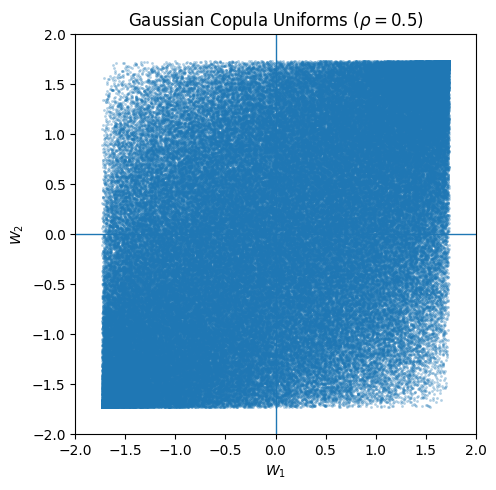

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm  # <-- use SciPy's CDF

# Parameters for Uniform[alpha, beta] with mean 0 and variance 1
alpha, beta = -np.sqrt(3), np.sqrt(3)

def phi(z):
    """Standard normal CDF (vectorized) via SciPy."""
    return norm.cdf(z)

def gaussian_copula_uniforms(n, rho=0.5, alpha=alpha, beta=beta, seed=None):
    """
    Generate n samples from a 2D Gaussian copula with correlation rho,
    then map to Uniform[alpha, beta] marginals.
    Returns arrays (W1, W2).
    """
    rng = np.random.default_rng(seed)
    # Correlated normals via one-factor construction
    Z1 = rng.standard_normal(n)
    eps = rng.standard_normal(n)
    Z2 = rho * Z1 + np.sqrt(1 - rho**2) * eps

    U1 = phi(Z1)
    U2 = phi(Z2)
    W1 = alpha + (beta - alpha) * U1
    W2 = alpha + (beta - alpha) * U2
    return W1, W2

# --- Generate samples, plot, and estimate probability ---
n = 200_000
rho = 0.5  # matches Sigma's off-diagonal
W1, W2 = gaussian_copula_uniforms(n, rho=rho, seed=123)

# Empirical probability P[W1 >= 0, W2 >= 0]
est = np.mean((W1 >= 0) & (W2 >= 0))
print(f"Estimated P[W1>=0, W2>=0] ≈ {est:.6f}  |  Theoretical = 0.333333")

# Scatter plot
plt.figure(figsize=(5.2, 5.2))
plt.scatter(W1, W2, s=4, alpha=0.35, linewidths=0)
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)
plt.gca().set_aspect('equal', 'box')
plt.xlim(-2, 2); plt.ylim(-2, 2)
plt.title(r"Gaussian Copula Uniforms ($\rho=0.5$)")
plt.xlabel(r"$W_1$"); plt.ylabel(r"$W_2$")
plt.show()
